# BİLGİSAYAR MÜHENDİSLİĞİ - MAKİNE ÖĞRENMESİ PROJE ÖDEVİ
**Adınız:** Eren Ali Koca  
**Okul Numaranız:** 2212721021  
**GitHub Repo Bağlantısı:** https://github.com/erennali/YoloV8_Nesne_Tespiti  

Bu notebook Google Colab'da çalıştırılmak üzere hazırlanmıştır.


## 1. Google Drive Bağlantısı

Google Drive'ınızı bağlayın ve izin verin.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Uyg2')
print("Çalışma dizini:", os.getcwd())


Mounted at /content/drive
Çalışma dizini: /content/drive/MyDrive/Uyg2


## 2. GPU Kontrolü

Colab'da GPU kullandığınızdan emin olun: Runtime → Change runtime type → GPU


In [2]:
!nvidia-smi


Sun Nov 23 13:53:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 3. Kütüphane Kurulumu

YOLOv8 için Ultralytics kütüphanesini yüklüyoruz.


In [3]:
!pip install ultralytics

import ultralytics
from ultralytics import YOLO
from IPython.display import Image
import shutil

ultralytics.checks()


Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.9/112.6 GB disk)


## 4. Veri Seti Yapısı

Google Drive'ınızda şu klasör yapısını oluşturun:

```
MyDrive/
└── Uyg2/
    ├── data.yaml
    └── yolo_dataset/
        ├── train/
        │   ├── images/  (103 görsel)
        │   └── labels/  (103 txt)
        └── val/
            ├── images/  (27 görsel)
            └── labels/  (27 txt)
```

Veri setimizde **2 sınıf** bulunmaktadır: `airpods` ve `magic_mouse`


## 5. Model Eğitimi

YOLOv8n (nano) modelini transfer learning ile eğitiyoruz.

**Eğitim Parametreleri:**
- **data**: `/content/drive/MyDrive/Uyg2/data.yaml`
- **epochs**: 50
- **imgsz**: 640
- **device**: 0 (GPU)


In [4]:
model = YOLO('yolov8n.pt')

results = model.train(
    data='/content/drive/MyDrive/Uyg2/data.yaml',
    epochs=50,
    imgsz=640,
    device=0,
    plots=True,
    name='yolov8_custom_training'
)


Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Uyg2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_custom_training, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=

## 6. Eğitim Sonuçları

Loss ve mAP grafiklerini görselleştiriyoruz.


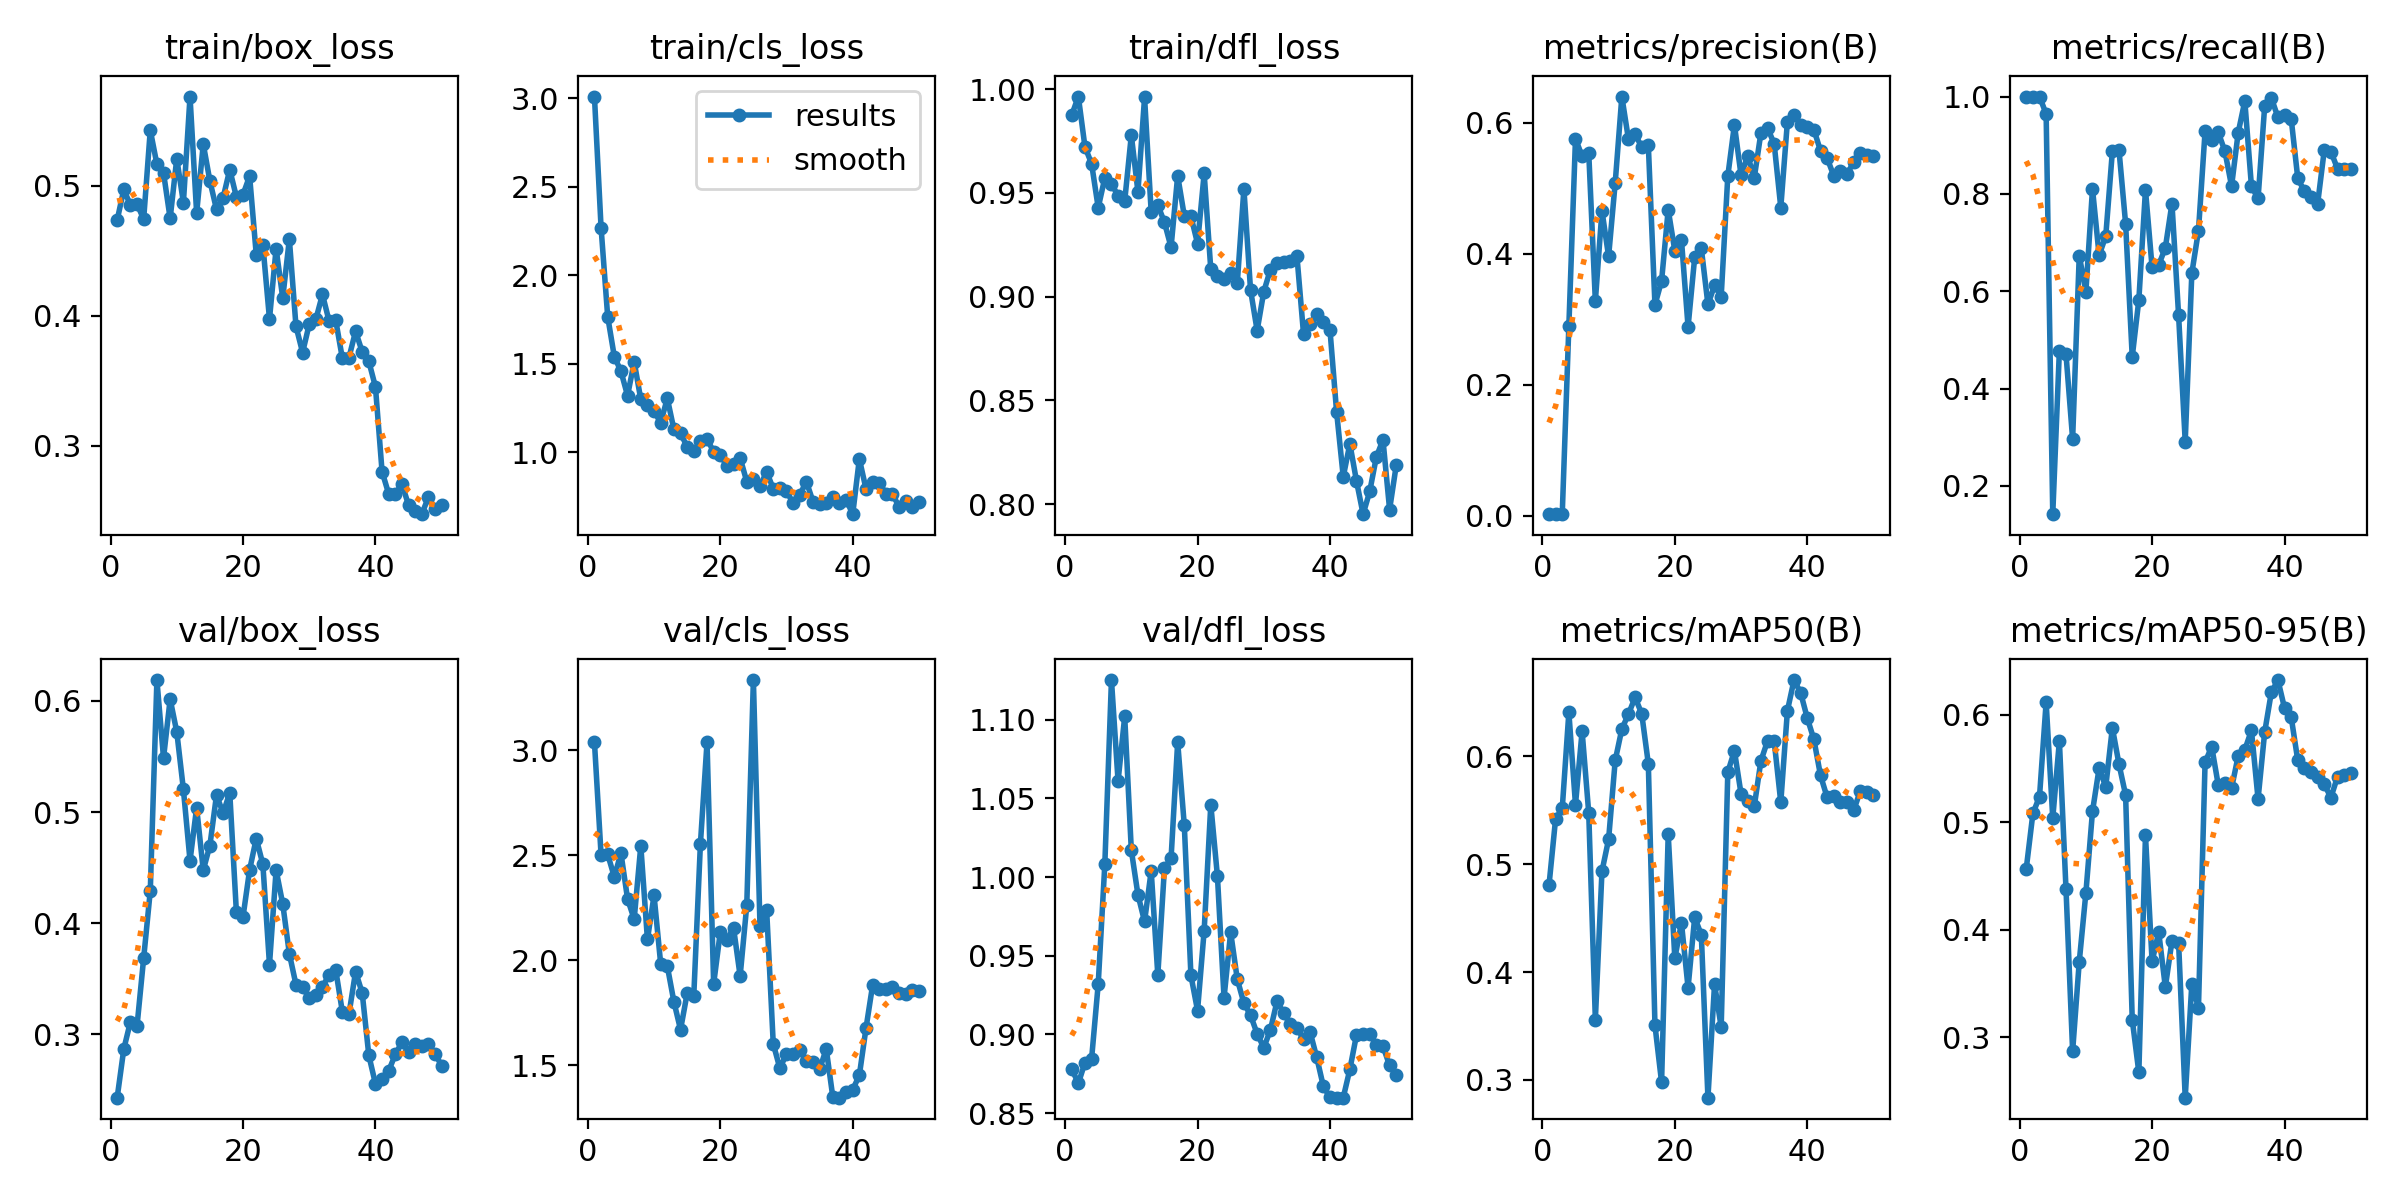

In [5]:
results_path = f'{results.save_dir}/results.png'
if os.path.exists(results_path):
    display(Image(filename=results_path))
else:
    print("Grafik bulunamadı.")


## 7. Confusion Matrix

Modelin sınıflar arası performansını gösteren confusion matrix'i görüntüleyelim.


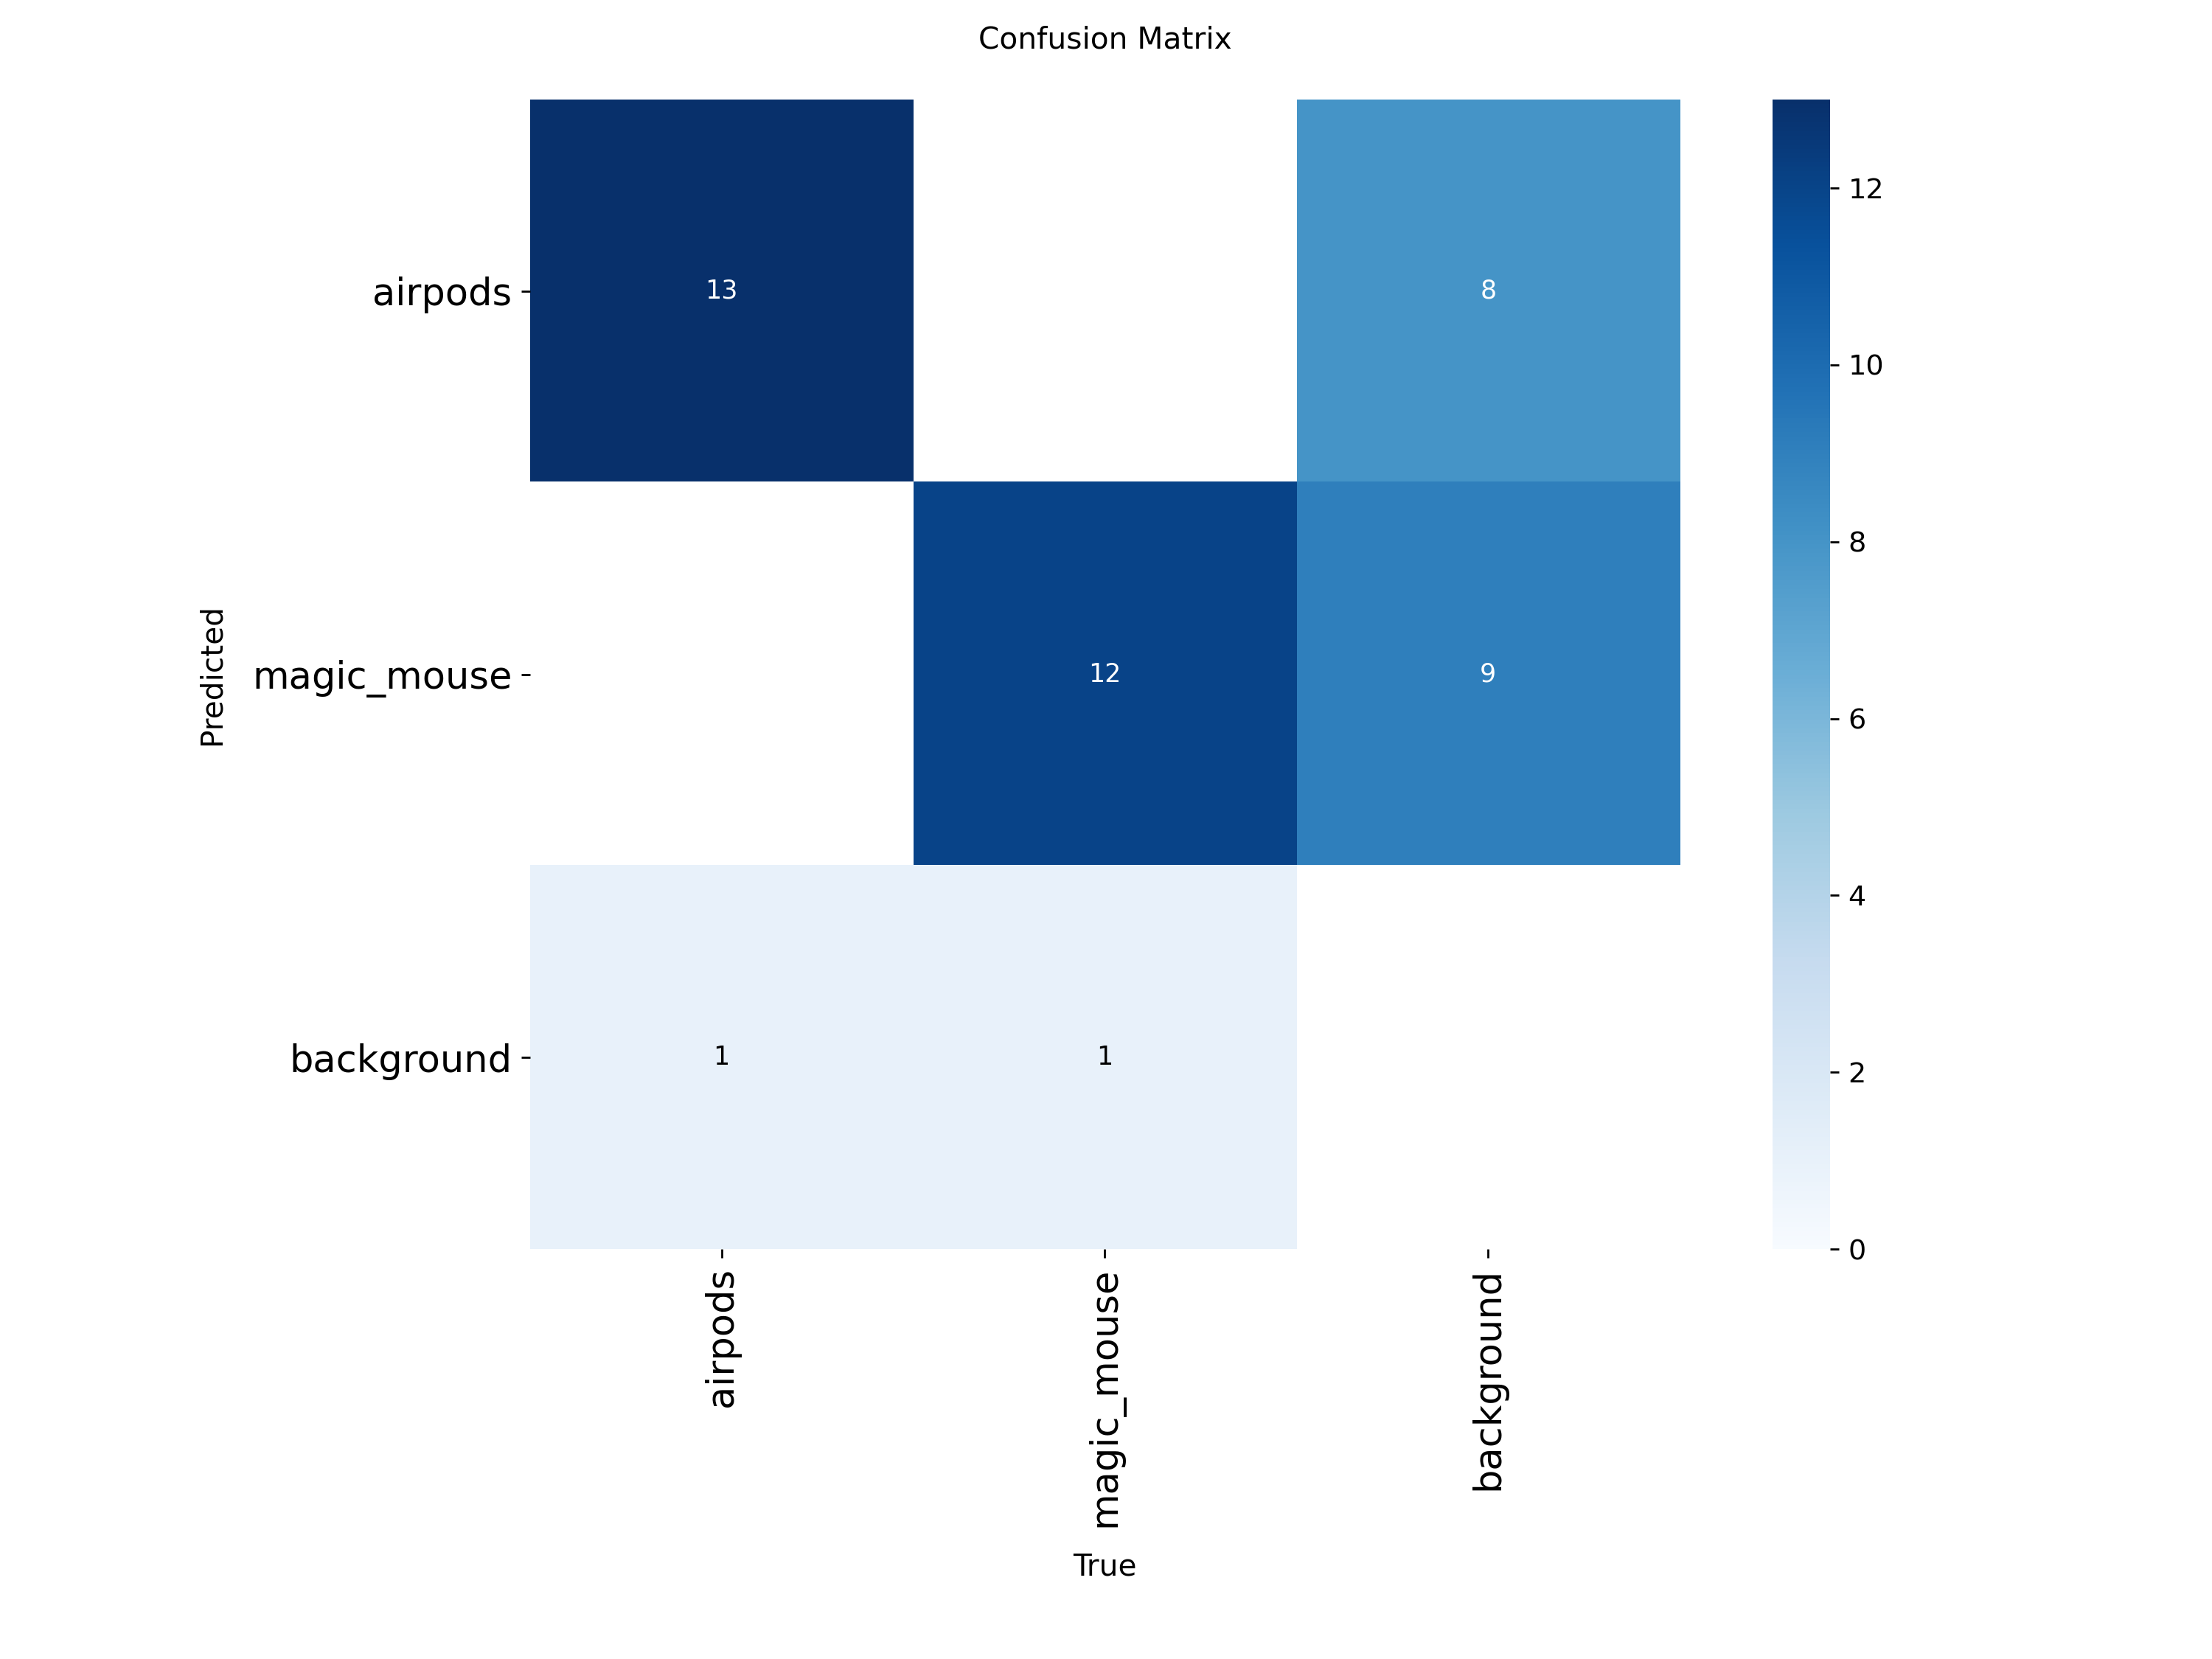

In [6]:
confusion_path = f'{results.save_dir}/confusion_matrix.png'
if os.path.exists(confusion_path):
    display(Image(filename=confusion_path))


## 8. Model Performans Değerlendirmesi

Doğrulama seti üzerinde modelin performansını ölçüyoruz.


In [7]:
metrics = model.val()
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")


Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 324.3±61.8 MB/s, size: 2189.1 KB)
val: Scanning /content/drive/MyDrive/Uyg2/yolo_dataset/val/labels.cache... 27 images, 17 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 44/44 25.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 4.7s/it 14.2s
                   all         44         27      0.597      0.958      0.648      0.622
               airpods         14         14      0.634      0.992      0.696      0.682
           magic_mouse         13         13      0.559      0.923        0.6      0.562
Speed: 3.5ms preprocess, 23.7ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to /content/drive/MyDrive/Uyg2/runs/detect/val
mAP50: 0.6478
mAP50-95: 0.6221


## 9. Eğitilmiş Modelin Kaydedilmesi

En iyi model ağırlıkları Drive'a kaydedilir.


In [8]:
best_model_path = f'{results.save_dir}/weights/best.pt'
destination_path = '/content/drive/MyDrive/Uyg2/best.pt'

if os.path.exists(best_model_path):
    shutil.copy(best_model_path, destination_path)
    print(f"✅ Model kaydedildi: {destination_path}")
else:
    print("❌ Model dosyası bulunamadı.")


✅ Model kaydedildi: /content/drive/MyDrive/Uyg2/best.pt


## 10. Test Görseli ile Deneme

Eğitilen modeli bir test görseli üzerinde deneyelim.


In [9]:
test_image = '/content/drive/MyDrive/Uyg2/yolo_dataset/val/images/IMG_6103.JPG'

results = model(test_image)
results[0].show()


Output hidden; open in https://colab.research.google.com to view.

📸 Bilgisayarınızdan görsel yükleyin...


Saving IMG_6116.JPG to IMG_6116.JPG

🔍 IMG_6116.JPG analiz ediliyor...

image 1/1 /content/drive/MyDrive/Uyg2/IMG_6116.JPG: 640x480 1 airpods, 12.1ms
Speed: 4.3ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


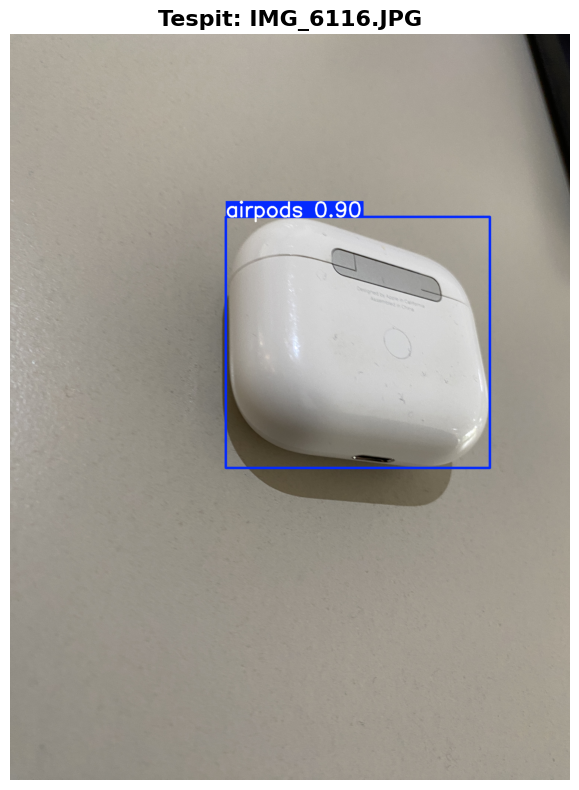


📊 Tespit Edilen Nesneler:
  - airpods: %90.1 güven

✅ Toplam: 1 nesne
  • airpods: 1 adet


In [11]:
# 📸 Bilgisayardan Görsel Yükle ve Tahmin Yap

from google.colab import files
import matplotlib.pyplot as plt

print("📸 Bilgisayarınızdan görsel yükleyin...")
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"\n🔍 {filename} analiz ediliyor...")

    results = model(filename)
    result = results[0]

    plt.figure(figsize=(12, 8))
    plt.imshow(result.plot()[:,:,::-1])
    plt.axis('off')
    plt.title(f'Tespit: {filename}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\n📊 Tespit Edilen Nesneler:")
    class_counts = {}
    for box in result.boxes:
        class_id = int(box.cls[0])
        class_name = model.names[class_id]
        confidence = float(box.conf[0])
        class_counts[class_name] = class_counts.get(class_name, 0) + 1
        print(f"  - {class_name}: %{confidence*100:.1f} güven")

    print(f"\n✅ Toplam: {sum(class_counts.values())} nesne")
    for cls, cnt in class_counts.items():
        print(f"  • {cls}: {cnt} adet")